In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np 
from numpy import log
import gmaps 
import gmaps.datasets 
import matplotlib.pyplot as plt
import matplotlib.pyplot as set_ylim
from datetime import datetime
import shap
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

<h4>Load data</h4>

In [118]:
# import predictions data for use in the carbon zero simulation
y_hat_pred = pd.read_csv('stationary-data/y_hat_pred.csv')

In [140]:
y_hat_pred.head(100)

,Unnamed: 0,code_release_pred
0,0,18.151557
1,1,22.288971
2,2,20.192557
3,3,18.106214
4,4,18.989950
5,5,19.015050
6,6,20.288431
7,7,19.249870
8,8,20.145989
9,9,17.825421


In [150]:
# read in X_train data
X_train = pd.read_csv('stationary-data/X_train.csv')

In [181]:
# read in X_train data
y_train = pd.read_csv('stationary-data/y_train.csv')

In [182]:
y_train

,Unnamed: 0,code_release
0,6410,16
1,4903,24
2,367,20
3,2448,20
4,4206,18
5,453,20
6,3242,18
7,9970,19
8,6029,18
9,5266,19


In [151]:
# join predictions with X_train 
comb_df = pd.merge(X_train, y_hat_pred)

In [184]:
comb_df['code_release_act'] = y_train['code_release']

In [186]:
comb_df = comb_df.drop(columns='unique_id')

In [154]:
# read in electricity consumption and building data
kwh_year_df = pd.read_csv('clean-data/kwh_year.csv')

In [155]:
kwh_year_df.head()

,Unnamed: 0,Service Address,avg_kwh,Latitude,Longitude,Parcel Number,prop_id,Effective_YrBlt,Heated_SquareFeet,Stories,kwh_per_sqft,code_release
0,0,2629 NW 55TH BLVD,726.077670,29.705149,-82.361609,6014021030,32391,1977,1498.0,1.0,0.484698,16
1,1,2928 NW 22ND ST,2758.873786,29.679885,-82.353693,9004018000,78433,1984,2971.0,1.0,0.928601,18
2,2,2928 NW 22ND ST,2758.873786,29.679885,-82.353693,9004018000,78433,1984,2971.0,1.0,0.928601,18
3,3,2928 NW 22ND ST,2758.873786,29.679885,-82.353693,9004018000,78433,1984,2971.0,1.0,0.928601,18
4,4,2928 NW 22ND ST,2758.873786,29.679885,-82.353693,9004017000,78432,2010,1222.0,2.0,2.257671,27


In [153]:
# join previous (comb_df) join with actual (kwh_year_df)
comb_orig_df = pd.merge(comb_df, kwh_year_df, on='how='left')

In [48]:
# index_pred_df = index_pred_df.drop(columns='Unnamed: 0')

In [49]:
# index_pred_df = index_pred_df.rename(columns={'code_release': 'code_release_pred'})

In [120]:
# index_pred_df = index_pred_df.set_index('Parcel Number')

In [145]:
# kwh_year_df.info()

In [132]:
X_train.head()

,Unnamed: 0,avg_kwh,Latitude,Longitude,Heated_SquareFeet,kwh_per_sqft
0,6410,1027.639344,29.705515,-82.364586,1516.0,0.677862
1,4903,766.774510,29.612746,-82.371744,1172.0,0.654244
2,367,544.843137,29.611465,-82.360356,5944.0,0.091663
3,2448,1026.689320,29.675848,-82.384052,1684.0,0.609673
4,4206,500.291262,29.635181,-82.343227,1120.0,0.446689


In [141]:
X_train_index_sorted = X_train.sort_values(by=['Unnamed: 0'])
X_train_index_sorted.head()

,Unnamed: 0,avg_kwh,Latitude,Longitude,Heated_SquareFeet,kwh_per_sqft
4052,0,726.077670,29.705149,-82.361609,1498.0,0.484698
1586,1,2758.873786,29.679885,-82.353693,2971.0,0.928601
4397,2,2758.873786,29.679885,-82.353693,2971.0,0.928601
1347,8,12088.951456,29.632235,-82.361566,1177.0,10.270987
2287,9,12088.951456,29.632235,-82.361566,1177.0,10.270987


In [130]:
# col_kwh_year_df = col_kwh_year_df.drop(columns='Unnamed: 0')

In [134]:
col_kwh_year_df.head()

,Unnamed: 0,avg_kwh,Latitude,Longitude,Heated_SquareFeet,kwh_per_sqft
0,0,726.077670,29.705149,-82.361609,1498.0,0.484698
1,1,2758.873786,29.679885,-82.353693,2971.0,0.928601
2,2,2758.873786,29.679885,-82.353693,2971.0,0.928601
3,3,2758.873786,29.679885,-82.353693,2971.0,0.928601
4,4,2758.873786,29.679885,-82.353693,1222.0,2.257671


#### Join observed code release and predicted efficiency index dataframes

In [52]:
len(kwh_year_df['Parcel Number'].unique())

8635

In [53]:
kwh_year_df = kwh_year_df.drop_duplicates(subset=['Parcel Number'])

In [54]:
kwh_year_df = kwh_year_df.set_index('Parcel Number')

In [55]:
preds_electricity_df = index_pred_df.join(kwh_year_df, how="left", on='Parcel Number', lsuffix='_left', rsuffix='_right')
# electricity_df['preds'] = preds_electricity_df['preds']


In [15]:
# preds_electricity_df = preds_electricity_df.drop(columns='Unnamed: 0')

In [18]:
# preds_electricity_df = preds_electricity_df.reset_index()

<h4>How different are the predicted efficiency indexe from the code releases?</h4>

In [38]:
# address = electricity_df[['Service Address', 'preds']].groupby('Service Address')['preds'].agg('count')


In [74]:
# address_df = address.to_frame()

In [13]:
# address_df = address_df.reset_index()

In [75]:
# address_df.info()

In [76]:
# # there are 195 different counts of a prediction across 100,313 addresses  
# address_df['preds'].unique()

In [56]:
preds_electricity_df.columns

Index(['avg_kwh_left', 'Heated_SquareFeet_left', 'kwh_per_sqft_left',
       'code_release_pred', 'Unnamed: 0', 'Service Address', 'avg_kwh_right',
       'Latitude', 'Longitude', 'prop_id', 'Effective_YrBlt',
       'Heated_SquareFeet_right', 'Stories', 'kwh_per_sqft_right',
       'code_release'],
      dtype='object')

In [57]:
preds_electricity_df.head(100)

,avg_kwh_left,Heated_SquareFeet_left,kwh_per_sqft_left,code_release_pred,Unnamed: 0,Service Address,avg_kwh_right,Latitude,Longitude,prop_id,Effective_YrBlt,Heated_SquareFeet_right,Stories,kwh_per_sqft_right,code_release
Parcel Number,,,,,,,,,,,,,,,
10804073000,1225.220779,1132.0,1.082351,17.332195,5934,1627 NE 18TH PL,1225.220779,29.668671,-82.302883,82649,1978,1132.0,1.0,1.082351,16
11879010000,1371.841584,2980.0,0.460350,17.445228,4927,304 NE 9TH ST,1371.841584,29.654129,-82.314745,85266,1985,2980.0,2.0,0.460350,19
8210003001,143973.069307,30062.0,4.789205,20.532175,8856,3500 NE 4TH ST,143973.069307,29.685617,-82.320491,75909,1974,30062.0,1.0,4.789205,15
6020005000,44957.365079,42506.0,1.057671,21.925891,692,4000 NW 53RD AVE,44957.365079,29.703383,-82.383209,33737,2004,42506.0,2.0,1.057671,25
15995012000,1420.455446,1250.0,1.136364,17.182096,8834,1390 SE 23RD AVE,1420.455446,29.631012,-82.307393,91908,1972,1250.0,1.0,1.136364,14
9003014111,8304.436893,1070.0,7.761156,16.461103,813,1810 NW 23RD BLVD,8304.436893,29.674256,-82.345551,78288,1972,1070.0,1.0,7.761156,14
9001001000,6296.165049,2291.0,2.748217,17.364486,580,2601 NW 23RD BLVD APT 246,815.368932,29.678140,-82.349207,78127,1985,2291.0,1.0,0.355901,19
11120034000,443.205882,1560.0,0.284106,17.603885,5745,2406 NE 4TH AVE,443.205882,29.654928,-82.293193,84084,2007,1560.0,1.0,0.284106,26
6532015000,1265.601942,2557.0,0.494956,17.917692,4869,3941 SW 6TH PL,1265.601942,29.646336,-82.384078,50163,1976,2557.0,1.0,0.494956,16


In [58]:
preds_min_df = preds_electricity_df.drop(columns=['Service Address',
       'avg_kwh_right', 'Latitude', 'Longitude', 'prop_id', 'Effective_YrBlt',
       'Heated_SquareFeet_right', 'Stories', 'kwh_per_sqft_right'])

In [189]:
comb_df['pred_resid'] = comb_df['code_release_act'] - comb_df['code_release_pred']


In [188]:
comb_df.head()

,Unnamed: 0,avg_kwh,Latitude,Longitude,Heated_SquareFeet,kwh_per_sqft,code_release_pred,code_release_act
0,4903,766.774510,29.612746,-82.371744,1172.0,0.654244,17.684483,16
1,367,544.843137,29.611465,-82.360356,5944.0,0.091663,18.911936,24
2,2448,1026.689320,29.675848,-82.384052,1684.0,0.609673,18.211923,20
3,4206,500.291262,29.635181,-82.343227,1120.0,0.446689,17.898152,20
4,453,10421.077670,29.650125,-82.407729,2789.0,3.736493,18.189372,18


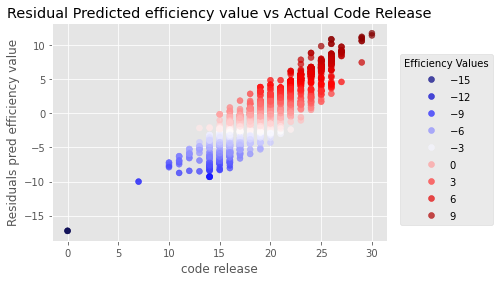

In [191]:
# plot efficiency value residual across code releases

x = comb_df['code_release_act']
y = comb_df['pred_resid']

# cmap['Diverging'] = [
#             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

c = comb_df['pred_resid']


fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, cmap='seismic', alpha=0.7)
# cbar = plt.colorbar()
# cbar.set_label('Efficiency Value')
ax.set_title('Residual Predicted efficiency value vs Actual Code Release')
ax.set_xlabel('code release')
ax.set_ylabel('Residuals pred efficiency value')

legend = ax.legend(*scatter.legend_elements(),
                    loc="lower right", bbox_to_anchor=(1.33, 0.05), title="Efficiency Values")

In [192]:
# wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data' 
# wine_column_headers = ['Alcohol','Malic acid','Ash','Alcalinity of ash',  
#                        'Magnesium','Total phenols','Flavanoids',
#                        'Nonflavanoid phenols','Proanthocyanins','Color intensity', 
#                        'Hue','OD280/OD315 of diluted wines' ,'Proline']
# wine_df = pd.read_csv(wine_url, names = wine_column_headers)
# wine_df.head()

When the actual code release is less than the predicted efficiency value then the residual is a negative value. This indicates that the building is less efficient than expected given the efficiency standards the year it was built. This indicates there may be an opportunity for energy efficiency professionals to have a bigger impact.

#### Create feature for efficiency improvement rollout groups 

In [193]:
comb_df.head()

,Unnamed: 0,avg_kwh,Latitude,Longitude,Heated_SquareFeet,kwh_per_sqft,code_release_pred,code_release_act,pred_resid
0,4903,766.774510,29.612746,-82.371744,1172.0,0.654244,17.684483,16,-1.684483
1,367,544.843137,29.611465,-82.360356,5944.0,0.091663,18.911936,24,5.088064
2,2448,1026.689320,29.675848,-82.384052,1684.0,0.609673,18.211923,20,1.788077
3,4206,500.291262,29.635181,-82.343227,1120.0,0.446689,17.898152,20,2.101848
4,453,10421.077670,29.650125,-82.407729,2789.0,3.736493,18.189372,18,-0.189372


In [194]:
preds_min_df = comb_df.sort_values(by=['pred_resid'], ascending=False)

In [195]:
preds_min_df = preds_min_df.reset_index(drop=True)

In [196]:
preds_min_df.head()

,Unnamed: 0,avg_kwh,Latitude,Longitude,Heated_SquareFeet,kwh_per_sqft,code_release_pred,code_release_act,pred_resid
0,1210,855.281553,29.641625,-82.398242,9670.0,0.088447,18.242062,30,11.757938
1,4603,15945.631068,29.664796,-82.329029,8142.0,1.958442,18.559193,30,11.440807
2,4018,1132.097087,29.662050,-82.387594,1596.0,0.709334,17.765639,29,11.234361
3,5062,415.582524,29.619821,-82.361621,1001.0,0.415167,17.878270,29,11.121730
4,3214,687.757282,29.671368,-82.353426,1924.0,0.357462,18.026076,29,10.973924


In [197]:
preds_min_df['phase'] = preds_min_df['pred_resid']
preds_min_df.head()

,Unnamed: 0,avg_kwh,Latitude,Longitude,Heated_SquareFeet,kwh_per_sqft,code_release_pred,code_release_act,pred_resid,phase
0,1210,855.281553,29.641625,-82.398242,9670.0,0.088447,18.242062,30,11.757938,11.757938
1,4603,15945.631068,29.664796,-82.329029,8142.0,1.958442,18.559193,30,11.440807,11.440807
2,4018,1132.097087,29.662050,-82.387594,1596.0,0.709334,17.765639,29,11.234361,11.234361
3,5062,415.582524,29.619821,-82.361621,1001.0,0.415167,17.878270,29,11.121730,11.121730
4,3214,687.757282,29.671368,-82.353426,1924.0,0.357462,18.026076,29,10.973924,10.973924


In [198]:
phase_df = preds_min_df[['phase']]

In [199]:
#8615
phase_num = len(preds_min_df)/4
phase_1 = phase_num
phase_2 = phase_num*2
phase_3 = phase_num*3
phase_4 = phase_num*4


phase_df.loc[0:phase_1, 'phase'] = 1
phase_df.loc[phase_1:phase_2, 'phase'] = 2
phase_df.loc[phase_2:phase_3, 'phase'] = 3
phase_df.loc[phase_3:phase_4, 'phase'] = 4


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [200]:
preds_min_df['phase'] = phase_df
preds_min_df

,Unnamed: 0,avg_kwh,Latitude,Longitude,Heated_SquareFeet,kwh_per_sqft,code_release_pred,code_release_act,pred_resid,phase
0,1210,855.281553,29.641625,-82.398242,9670.0,0.088447,18.242062,30,11.757938,1.0
1,4603,15945.631068,29.664796,-82.329029,8142.0,1.958442,18.559193,30,11.440807,1.0
2,4018,1132.097087,29.662050,-82.387594,1596.0,0.709334,17.765639,29,11.234361,1.0
3,5062,415.582524,29.619821,-82.361621,1001.0,0.415167,17.878270,29,11.121730,1.0
4,3214,687.757282,29.671368,-82.353426,1924.0,0.357462,18.026076,29,10.973924,1.0
5,770,579.902913,29.634403,-82.385025,1986.0,0.291995,15.131245,26,10.868755,1.0
6,2626,575.077670,29.695533,-82.376226,1617.0,0.355645,15.138025,26,10.861975,1.0
7,5286,558.359223,29.684879,-82.359146,1234.0,0.452479,18.345979,29,10.654021,1.0
8,1241,886.718447,29.624660,-82.358705,6480.0,0.136839,18.400103,29,10.599897,1.0
9,1276,459.310680,29.624660,-82.358705,6480.0,0.070881,15.790363,26,10.209637,1.0


In [201]:
# calculate avg kwh for each phase 
phase_1_avg = preds_min_df[preds_min_df['phase'] == 1]['avg_kwh'].agg('mean')
phase_2_avg = preds_min_df[preds_min_df['phase'] == 2]['avg_kwh'].agg('mean')
phase_3_avg = preds_min_df[preds_min_df['phase'] == 3]['avg_kwh'].agg('mean')
phase_4_avg = preds_min_df[preds_min_df['phase'] == 4]['avg_kwh'].agg('mean')
print(phase_1_avg, phase_2_avg, phase_3_avg, phase_4_avg)

3212.1891155807666 3302.7971164640726 3182.907276495421 4011.506785622089


#### Add dates for phases

In [290]:
# # Create a dataframe with index length of my prediction 
# date_df.index = pd.to_datetime(date_df.index, infer_datetime_format=True)
# index = pd.date_range(start='2020-01-31', end='2022-01-31', freq='M')
# columns = ['phase']
# future_kwh_full = pd.DataFrame(index=index, columns=columns)

In [272]:
future_kwh_full.head()

,phase
2020-01-31,NaN
2020-02-29,NaN
2020-03-31,NaN
2020-04-30,NaN
2020-05-31,NaN


#### Export for efficiency phase rollout simulation in Dash

In [266]:
# export efficiency improvement rollout df for use in Carbon zero simulation
preds_min_df.to_csv(r'stationary-data/preds_min_df.csv', header=True)

In [267]:
preds_min_df.head()

,Parcel Number,avg_kwh,Heated_SquareFeet,kwh_per_sqft,code_release_pred,code_release,pred_resid,phase
0,9024003000,205.030303,2440.0,0.084029,16.387264,30,13.612736,1.0
1,9971001000,386.581395,8158.0,0.047387,15.940885,29,13.059115,1.0
2,10606014000,1032.479592,1260.0,0.819428,17.441719,30,12.558281,1.0
3,11105000000,336.141414,1032.0,0.325718,17.583820,30,12.416180,1.0
4,11686014000,579.281553,908.0,0.637975,16.778669,29,12.221331,1.0


<h4>What is the distribution of efficiency values for an given address over time?</h4>

In [214]:
#  electricity_df[200:400]

In [212]:
# add_1 = electricity_df[electricity_df['Service Address'] == '8574 SW 26TH LN']
# add_2 = electricity_df[electricity_df['Service Address'] == '8901 SW 67TH PL']
# add_3 = electricity_df[electricity_df['Service Address'] == '916 NW 6TH AVE']

In [213]:
# add_1 = add_1.sort_values(by=['Date'])
# add_2 = add_2.sort_values(by=['Date'])
# add_3 = add_3.sort_values(by=['Date'])

In [211]:
# # plot efficiency values for 8574 SW 26TH LN

# x = add_1['Date']
# y = add_1['preds']*100

# # plot energy consumption at same address 
# x2 = add_2['Date']
# y2 = add_2['KWH Consumption']

# # x3 = add_3['Date']
# # y3 = add_3['preds']


# fig, ax = plt.subplots(figsize=(20,5))
# ax.plot(x3, y3)
# ax.plot(x2, y2)
# ax.plot(x, y)
# ax.set_title('Efficiency Values for 8574 SW 26TH LN and 8901 SW 67TH PL')
# ax.set_xlabel('Date (2012 - 2020)')
# ax.set_ylabel('Efficiency Value')
# plt.xticks()
# plt.legend(loc=0)

In [210]:
# add_3.describe()

In [209]:
# add_2.describe()

In [208]:
# add_1.describe()

In [206]:
# add_2.head()

In [207]:
# # plot efficiency values for a single address

# x2 = add_2['Date']
# y2 = add_2['preds']

# fig, ax = plt.subplots(figsize=(20,10))

# ax.plot(x2, y2)
# ax.set_title('Efficiency Values for 8901 SW 67TH PL')
# ax.set_xlabel('Date (2012 - 2020)')
# ax.set_ylabel('Efficiency Value')